## Ohyb

### Př2:

Načtení nutných knihoven,

In [2]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image

a inicializace sázeného výstupu,

In [3]:
sp.init_printing()

U rámu podle obrázku stanovte bezpečnost vzhledem k meznímu stavu pružnosti, jestliže jsou dány rozměry prutu $a$ a $b$, liniové zatížení $\boldsymbol{q}$, rozměry obdélníkového příčného průřezu $h$ a $s$, *Young*ův modul pružnosti $E$ a mez kluzu $\sigma_k$.

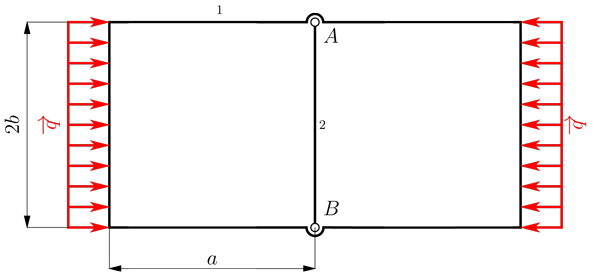

In [4]:
Image(filename='ohyb-ram3_a.png')

Úloha je $4\times$ staticky neurčitá.

*Úkol*: Proveďte úplné uvolnění a statický rozbor.

S využitím symetrie úlohy se statická neurčitost redukuje na $2$. Podmínka symetrie se může zapsat následovně,

$$
  \varphi_A=\frac{\partial W_1}{\partial M}=0.
$$

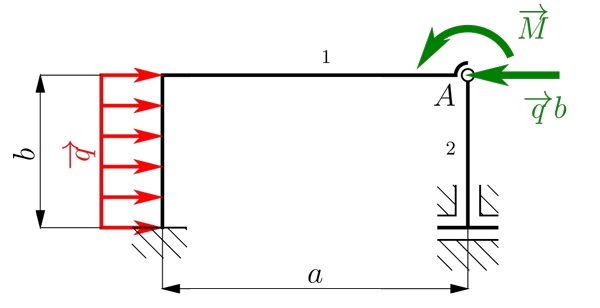

In [5]:
Image(filename='ohyb-ram3_b.png')

Částečné uvolnění vypadá následovně,

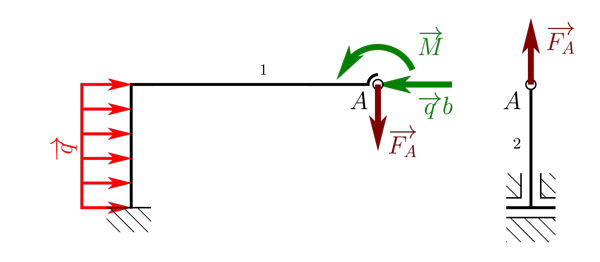

In [6]:
Image(filename='ohyb-ram3_c.png')

a deformační podmínky jsou následující. První odpovídá právě podmínce symetrie, druhá odpovídá spojení rámu a prutu,

\begin{equation}
  \varphi_A=\frac{\partial W_1}{\partial M}=0,\quad w_{1A}=\frac{\partial W_1}{\partial F_A}=-\frac{\partial W_2}{\partial F_A}=u_{2A}.
\end{equation}

Zavedení potřebných symbolů,

In [7]:
q,a,b=sp.symbols('q a b')
x1,x2,x3=sp.symbols('x1 x2 x3')
FA,M=sp.symbols('F_A M')
E,J1,S2=sp.symbols('E J1 S2')

Výsledné vnitřní účinky se mohou vyjádřit následovně. V případě zalomeného prutu uvolňujeme od volného konce, v případě přímého prutu to není podstatné, takže třeba z horního konce,

**VVÚ:**

Úsek I:

\begin{eqnarray}
  &&N_1=-qb, \\
  &&T_1=F_A, \\
  &&M_1=-F_Ax_1+M
\end{eqnarray}

pro $x_1\in(0,a)$.

Úsek II:

\begin{eqnarray}
  &&N_2=-F_A, \\
  &&T_2=-qb, \\
  &&M_2=-F_Aa+M+qbx_2-qx_2^2/2
\end{eqnarray}

pro $x_2\in(0,b)$.

Úsek III:

\begin{equation}
  N_3=F_A
\end{equation}

pro $x_3\in(0,b)$.

Zapsáno *Python*ovsky,

In [8]:
N1=-q*b
T1=FA
M1=-FA*x1+M
N1,T1,M1

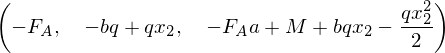

In [9]:
N2=-FA
T2=-q*b+q*x2
M2=-FA*a+M+q*b*x2-q*x2**2/2
N2,T2,M2

In [10]:
N3=FA
N3

Derivace vnitřních účinků podle $M$ a $F_A$,

In [11]:
dM1dM=M1.diff(M)
dM1dFA=M1.diff(FA)
dM2dM=M2.diff(M)
dM2dFA=M2.diff(FA)
dN3dFA=N3.diff(FA)

In [12]:
dM1dM,dM2dM

In [13]:
dM1dFA,dM2dFA,dN3dFA

Deformační podmínka a podmínka symetrie se mohou rozepsat následovně,

\begin{equation}
  \int_0^aM_1\frac{\partial M_1}{\partial M}\mathrm{d}x_1+
  \int_0^bM_2\frac{\partial M_2}{\partial M}\mathrm{d}x_2=0,
\end{equation}

\begin{equation}
  \frac{1}{EJ}\left[\int_0^aM_1\frac{\partial M_1}{\partial F_A}\mathrm{d}x_1+
  \int_0^bM_2\frac{\partial M_2}{\partial F_A}\mathrm{d}x_2\right]=
  -\frac{2}{ES}\int_0^bN_3\frac{\partial N_3}{\partial F_A}\mathrm{d}x_3.
\end{equation}

Zapsáno *Python*ovsky,

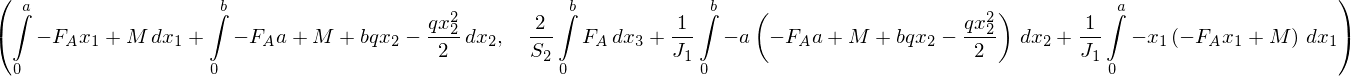

In [14]:
eqn1=sp.Integral(M1*dM1dM,[x1,0,a])+ \
     sp.Integral(M2*dM2dM,[x2,0,b])
eqn2=1/J1*sp.Integral(M1*dM1dFA,[x1,0,a])+ \
     1/J1*sp.Integral(M2*dM2dFA,[x2,0,b])+ \
     2/S2*sp.Integral(N3*dN3dFA,[x3,0,b])
eqn1,eqn2

Integrací se dostane soustava dvou rovnic o dvou neznámých $F_A$ a $M$. Jejich řešením je, 

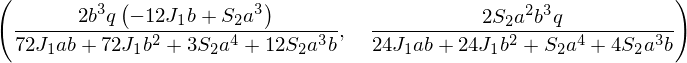

In [15]:
eqn1_,eqn2_=eqn1.doit(),eqn2.doit()
eqn1_=sp.expand(eqn1_)
eqn2_=sp.expand(eqn2_)
sol1=sp.linsolve([eqn1_,eqn2_],[M,FA])
M_solved,FA_solved=next(iter(sol1))
M_solved,FA_solved

Pro jednoduchost se další výpočty provedou numericky,

\begin{eqnarray}
  q&=&10\,\mathrm{N\times mm^{-1}}, \\
  a&=&1\,\mathrm{m}, \\
  b&=&1\,\mathrm{m}, \\
  d_1&=&50\,\mathrm{mm}, \\
  d_2&=&10\,\mathrm{mm}.
\end{eqnarray}

Zadáno *Python*ovsky,

In [16]:
q_=10.
a_,b_=1000.,1000.
d1_,d2_=50.,10.

Kvadratický moment plochy $J_1$ zalomeného prutu a průřez $S_2$ přímého prutu,

In [17]:
J1_=sp.pi*d1_**4/64.
S2_=sp.pi*d2_**2/4.

Dosazení numerických hodnot do výše vyjádřených $M$ a $F_A$,

In [18]:
FA_=FA_solved.subs({q:q_,a:a_,b:b_,J1:J1_,S2:S2_})
M_=M_solved.subs({q:q_,a:a_,b:b_,J1:J1_,S2:S2_})
FA_,M_

Dosazení numerických hodnot a hodnot $F_A$ a $M$ do výsledných vnitřních účinků,

In [19]:
N1_=N1.subs({q:q_,b:b_})
T1_=T1.subs(FA,FA_)
M1_=M1.subs({M:M_,FA:FA_,a:a_,b:b_,q:q_})
N1_,T1_,M1_

In [20]:
N2_=N2.subs(FA,FA_)
T2_=T2.subs({q:q_,b:b_,M:M_,FA:FA_})
M2_=M2.subs({M:M_,FA:FA_,a:a_,b:b_,q:q_})
N2_,T2_,M2_

In [21]:
N3_=N3.subs(FA,FA_)
N3_

#### Vykreslení výsledných vnitřních účinků

Vyjádření výsledných vnitřních účinků v rovnoměrně podél střednice

In [22]:
x1_=np.linspace(0,a_,20)
N1_plot=[float(N1_) for ii in x1_]
T1_plot=[float(T1_) for ii in x1_]
M1_plot=[float(M1_.subs(x1,ii)) for ii in x1_]
x2_=np.linspace(0,b_,20)
N2_plot=[float(N2_) for ii in x2_]
T2_plot=[float(T2_.subs(x2,ii)) for ii in x2_]
M2_plot=[float(M2_.subs(x2,ii)) for ii in x2_]
x3_=np.linspace(0,b_,20)
N3_plot=[float(N3_) for ii in x3_]

Vykreslení normálových vnitřních účinků $N(x)$,

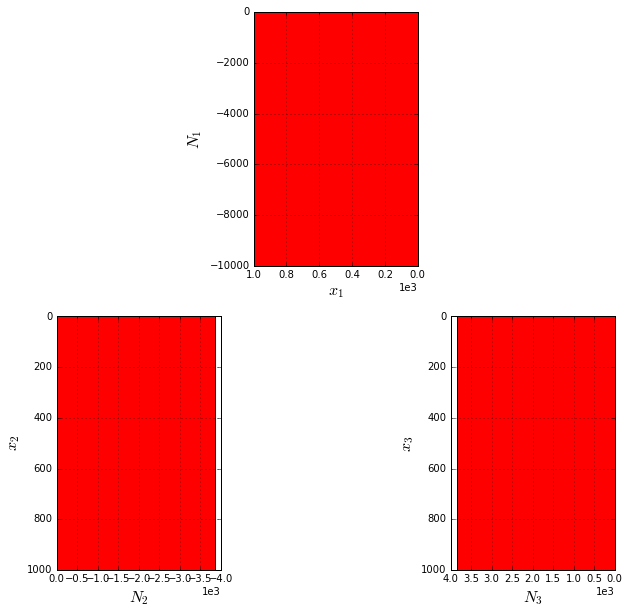

In [23]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))

ax1.axis('off')
ax3.axis('off')
ax5.axis('off')

ax2.fill_between(x1_,0,N1_plot,facecolor='red')
ax4.fill_betweenx(x2_,0,N2_plot,facecolor='red')
ax6.fill_betweenx(x3_,0,N3_plot,facecolor='red')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax4.invert_yaxis()
ax6.invert_xaxis()
ax6.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)
ax6.set_ylim(1000,0)
ax2.set_xlabel(r'$x_1$').set_fontsize(16)
ax2.set_ylabel(r'$N_1$').set_fontsize(16)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.set_ylabel(r'$x_2$').set_fontsize(16)
ax4.set_xlabel(r'$N_2$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.set_ylabel(r'$x_3$').set_fontsize(16)
ax6.set_xlabel(r'$N_3$').set_fontsize(16)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Vykreslení smykových vnitřních účinků $T(x)$,

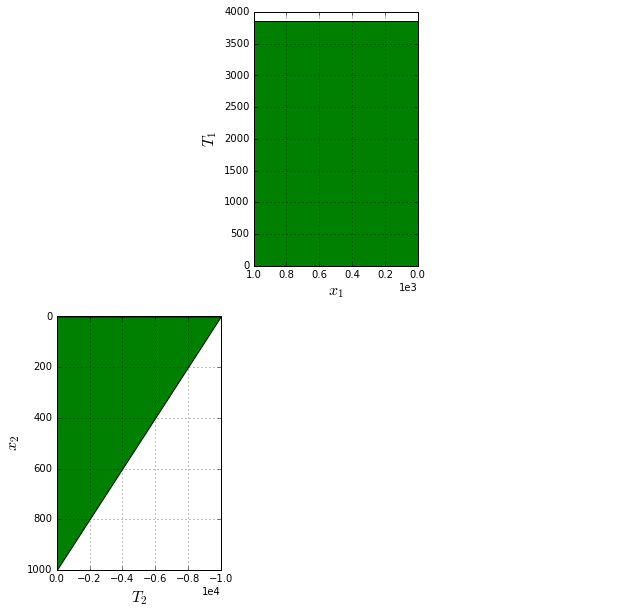

In [24]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))
ax1.axis('off')
ax3.axis('off')
ax5.axis('off')
ax6.axis('off')

ax2.fill_between(x1_,0,T1_plot,facecolor='green')
ax4.fill_betweenx(x2_,0,T2_plot,facecolor='green')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax4.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax2.set_xlabel(r'$x_1$').set_fontsize(16)
ax2.set_ylabel(r'$T_1$').set_fontsize(16)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.set_ylabel(r'$x_2$').set_fontsize(16)
ax4.set_xlabel(r'$T_2$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Vykreslení momentových vnitřních účinků $M(x)$,

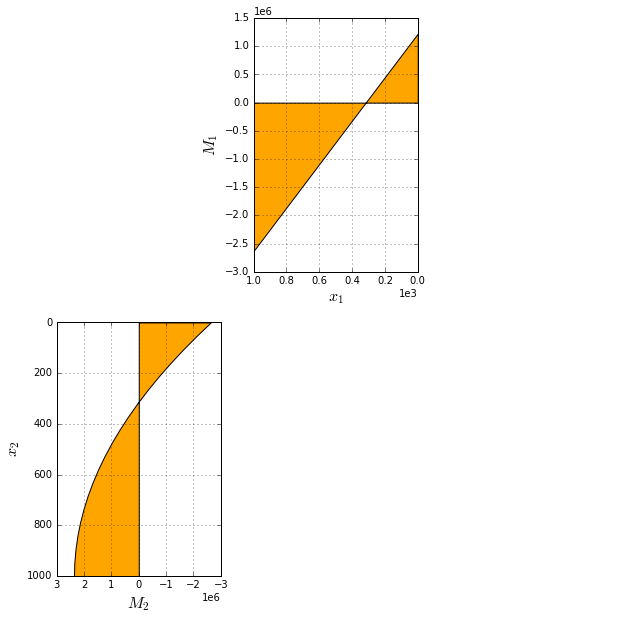

In [25]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))
ax1.axis('off')
ax3.axis('off')
ax5.axis('off')
ax6.axis('off')

ax2.fill_between(x1_,0,M1_plot,facecolor='orange')
ax4.fill_betweenx(x2_,0,M2_plot,facecolor='orange')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax4.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax2.set_xlabel(r'$x_1$').set_fontsize(16)
ax2.set_ylabel(r'$M_1$').set_fontsize(16)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.set_ylabel(r'$x_2$').set_fontsize(16)
ax4.set_xlabel(r'$M_2$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Extrémní napětí vyjádříme pouze z momentových vnitřních účinků $M(x)$. Z výše uvedých grafů je zřejmé, že globální extrémní hodnotu nabývá moment $M_1=M$ v bodě $x_1=0$ nebo $M_2(x_{max})$ v bodě $x_{max}$, který je buď v $x_2=0$ nebo $x_2=b$,

In [26]:
M_max_=(abs(M2_.subs(x2,0.0)),abs(M2_.subs(x2,b_)),abs(M_))
M_max=float(max(M_max_))
i_max=M_max_.index(M_max)
if i_max==0:
  print 'Maximalní moment je M1=M2={0:1.2e} Nmm v místě x1={1:1.2e} mm nebo x2=0.'.format(M_max,a_)
elif i_max==1:
  print 'Maximalní moment je M2={0:1.2e} Nmm v místě x2={1:1.2e} mm.'.format(M_max,b_)
elif i_max==2:
  print 'Maximalní moment je M1=M={0:1.2e} Nmm v místě x1=0. mm'.format(M_max)

Maximalní moment je M1=M2=2.63e+06 Nmm v místě x1=1.00e+03 mm nebo x2=0.


a odpovídající maximální napětí ve stejném místě,

In [27]:
s_max_=(float(d1_*M_max/J1_/2),float(abs(2*N3_/S2_)))
s_max=max(s_max_)
is_max=s_max_.index(s_max)
if i_max==0 and is_max==0:
  print 'Maximalní napětí je {0:11.5e} MPa v místě x1={1:11.5e} mm nebo x2=0.'.format(s_max,a_)
elif i_max==1 and is_max==0:
  print 'Maximalní napětí je {0:11.5e} MPa v místě x2={1:11.5e} mm.'.format(s_max,b_)
elif i_max==2 and is_max==0:
  print 'Maximalní napětí je {0:11.5e} MPa v místě x1=0.'.format(s_max)
else:
  print 'Maximalní napetí je {0:11.5e} MPa v prutu 2.'.format(s_max)

Maximalní napětí je 2.14354e+02 MPa v místě x1=1.00000e+03 mm nebo x2=0.
